In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()    #设置画图空间为 Seaborn 默认风格

### 数据收集

## CRIM犯罪率 ##
## ZN住宅用地所占比例
## INDUS城镇中非住宅用地所占比例
## CHAS是否穿过查尔斯河
## NOX氮氧化污染物
## RM每栋住宅的房间数
## GE1940年以前建成的自住单位的比例
## DIS距离5个波士顿的就业中心的加权距离
## RAD距离高速公路的便利指数
## TAX每一万美元的不动产税率
## PRTATIO城镇中的教师学生比例
## B城镇中的黑人比例
## LSTAT低收入群比例
## PRICE价格

In [2]:
names=['CRIM','ZN','INDUS','CHAS','NOX','RM','GE','DIS','RAD','TAX','PRTATIO','B','LSTAT','PRICE']      ##data数据没有数据标志，这里我根据网络上的信息自定义了names

boston=pd.read_csv("housing.data",names=names,delim_whitespace=True)
boston.head(15)                  #展示15行数据

,CRIM,ZN,INDUS,CHAS,NOX,RM,GE,DIS,RAD,TAX,PRTATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


### 数据预处理

In [3]:
boston.shape       ##这里是查看数据的大小 一共是506个数据 14个属性

(506, 14)

In [4]:
boston.info()      ##这里是显示该数据的各个属性参数值以及类型

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   GE       506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PRTATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
boston.isnull().sum()     ##此函数查看该数据是否有为0缺失的数据

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
GE         0
DIS        0
RAD        0
TAX        0
PRTATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

分析显示所有数据都没有缺失 为完整数据

### 数据分析

In [69]:
boston.describe()   #调用describe函数分析数据的均值、标准差、最大值等数据

,CRIM,ZN,INDUS,CHAS,NOX,RM,GE,DIS,RAD,TAX,PRTATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### 数据可视化

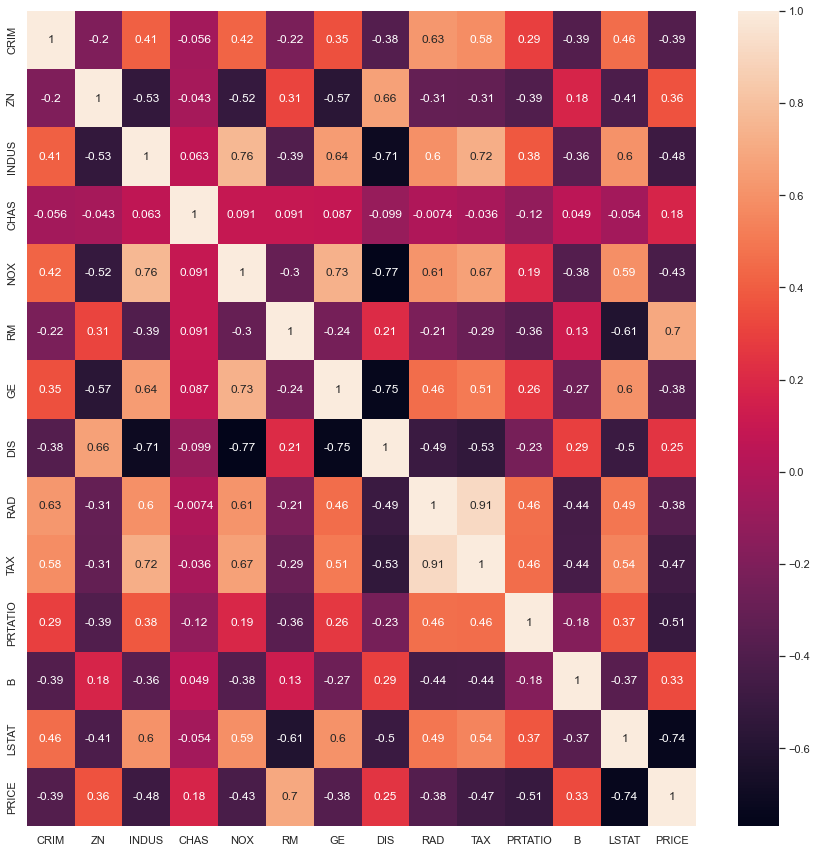

In [8]:
corrboston = boston.corr()   ##corr函数用与进行线性分析过程
corrboston

plt.figure(figsize=(15,15))        ##创建大小为15*15的画布显示对比值
sns.heatmap(corrboston,annot=True)
plt.show()

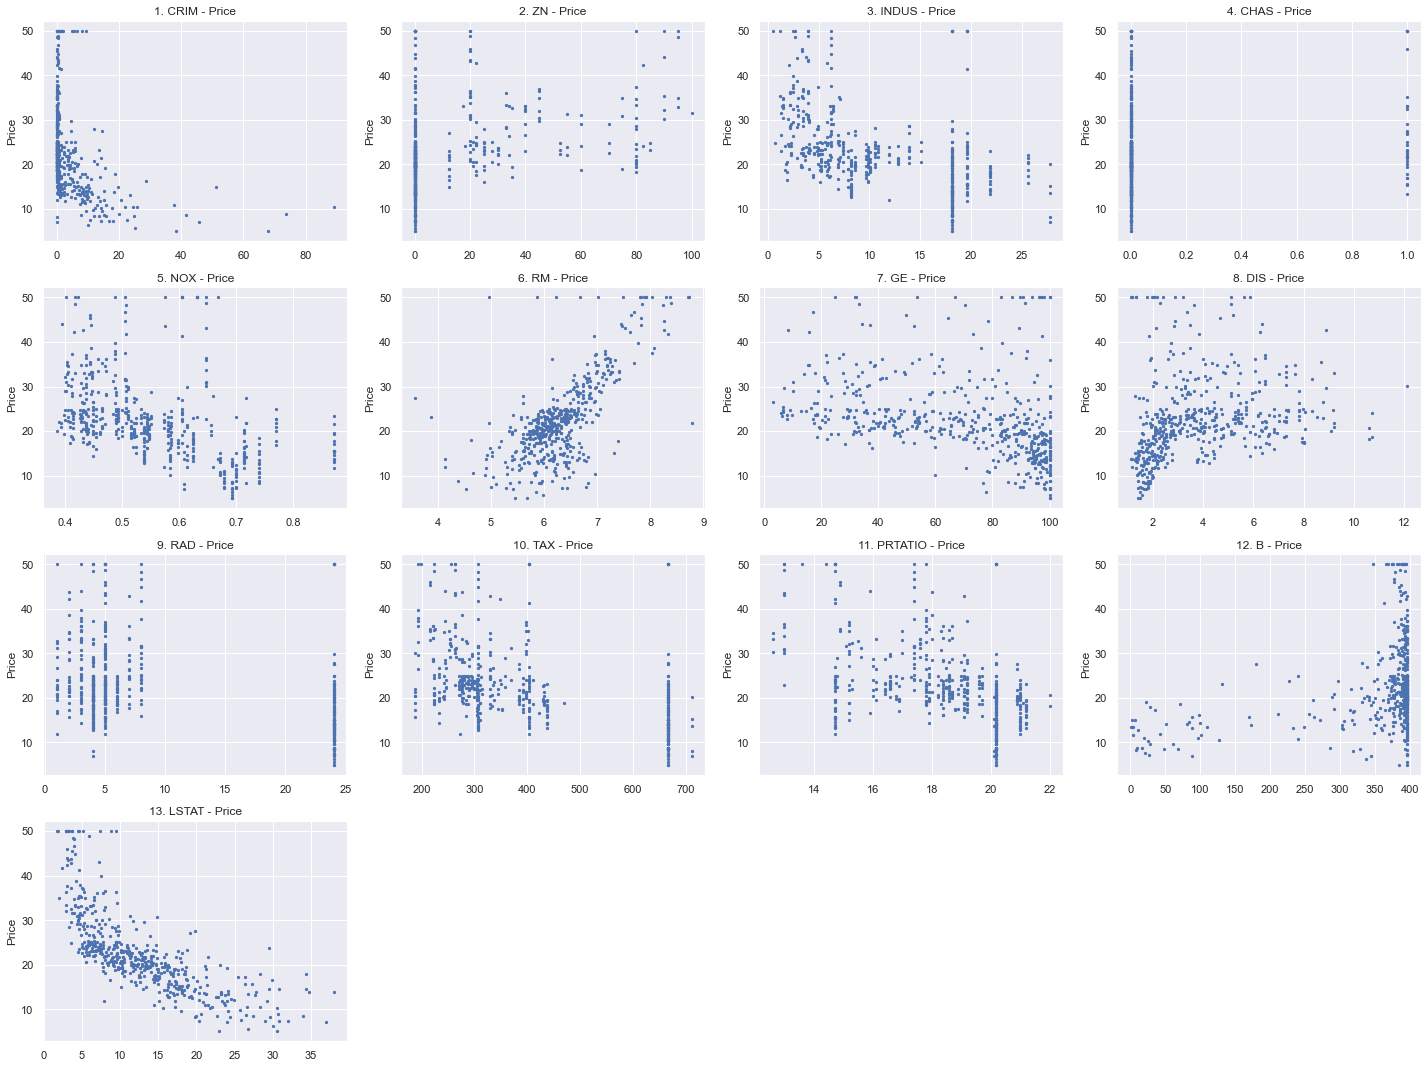

In [14]:
datax = boston[['CRIM','ZN','INDUS','CHAS','NOX','RM','GE','DIS','RAD','TAX','PRTATIO','B','LSTAT']] 
datay = boston[['PRICE']] 

plt.figure(figsize=(20,15))         ##创建20*15的画布

for i in range(13):           ##分13次输出每张图的信息
    plt.subplot(4,4,i+1)      ##这里是创建4*4个格子存放画布，一共13个画布
    plt.scatter(datax.values[:,i],datay,s = 5)    #.values将datax转成ndarray数组
    plt.ylabel('Price')           ##y轴打印Price
    plt.title(str(i+1)+'. '+names[i]+' - Price')   #标题处打印各表信息
    
plt.tight_layout()             ##layout函数自动将表格完善处理
plt.show()                     ##打印表格

### 数据回归分析

In [18]:
from sklearn import linear_model        ##创建回归模型

##定义线性回归的x和y变量
x=pd.DataFrame(boston[['CRIM','ZN','INDUS','CHAS','NOX','RM','GE','DIS','RAD','TAX','PRTATIO','B','LSTAT']])
y=boston['PRICE']
##将变量带入模型进行训练。
xunlian = linear_model.LinearRegression()
xunlian.fit(x, y)         ##fit用于机器训练

#查看回归系数。本例为一元回归,所以只有一个系数。
print('回归系数:', xunlian.coef_)

回归系数: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]


In [23]:
predit =xunlian.predict(x)
print(predit)                          ##此处是根据训练结果对数据进行预测

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211 18.99949651 21.58679568
 20.90652153 19.55290281 19.28348205 19.29748321 20.52750979 16.91140135
 16.17801106 18.40613603 12.52385753 17.67103669 15.83288129 13.80628535
 15.67833832 13.38668561 15.46397655 14.70847428 19.54737285 20.8764282
 11.45511759 18.05923295  8.81105736 14.28275814 13.70675891 23.81463526
 22.34193708 23.10891142 22.91502612 31.35762569 34.21510225 28.02056414
 25.20386628 24.60979273 22.94149176 22.09669817 20.42320032 18.03655088
  9.10655377 17.20607751 21.28152535 23.97222285 27.6558508  24.04901809
 15.3618477  31.15264947 24.85686978 33.10919806 21.77537987 21.08493555
 17.8725804  18.51110208 23.98742856 22.55408869 23.37308644 30.36148358
 25.53056512 21.11338564 17.42153786 20.78483633 25.20148859 21.7426577
 24.55744957 24.04295712 25.50499716 23.9669302  22.94545403 23.35699818
 21.26198266 22.42817373 28.40576968 26.99486086 26.0

接下来对比训练结果与真实值

In [24]:
from sklearn.metrics import r2_score
score = r2_score(y, predit)
score

0.7406426641094095

0.74接近1，说明训练结果拟合真实值，房价预测较为准确

# 房价预测

再一次带入训练值根据各项系数对房价进行预测

In [25]:
print(predit)  

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211 18.99949651 21.58679568
 20.90652153 19.55290281 19.28348205 19.29748321 20.52750979 16.91140135
 16.17801106 18.40613603 12.52385753 17.67103669 15.83288129 13.80628535
 15.67833832 13.38668561 15.46397655 14.70847428 19.54737285 20.8764282
 11.45511759 18.05923295  8.81105736 14.28275814 13.70675891 23.81463526
 22.34193708 23.10891142 22.91502612 31.35762569 34.21510225 28.02056414
 25.20386628 24.60979273 22.94149176 22.09669817 20.42320032 18.03655088
  9.10655377 17.20607751 21.28152535 23.97222285 27.6558508  24.04901809
 15.3618477  31.15264947 24.85686978 33.10919806 21.77537987 21.08493555
 17.8725804  18.51110208 23.98742856 22.55408869 23.37308644 30.36148358
 25.53056512 21.11338564 17.42153786 20.78483633 25.20148859 21.7426577
 24.55744957 24.04295712 25.50499716 23.9669302  22.94545403 23.35699818
 21.26198266 22.42817373 28.40576968 26.99486086 26.0

以上便是房价预测值

使用最小二乘法对房价预测值进行对比

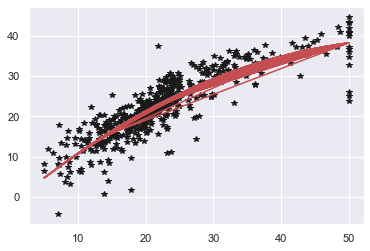

In [46]:
import numpy.linalg as lg
t=np.array(datay)
y=np.array(predit)
plt.figure()
plt.plot(t,y,'k*')
# y=at^2+bt+c

A=np.c_[t**2,t,np.ones(t.shape)]

w=lg.inv(A.T.dot(A)).dot(A.T).dot(y)

plt.plot(t,w[0]*t**2+w[1]*t+w[2],"r")
plt.show()

